In [1]:
from os import chdir
chdir('../')
%matplotlib inline
from lib import *
import seaborn as sns

In [2]:
pwd

'/home/jovyan/work/projects/project_2'

### Load Data

In [3]:
#  data
features = pd.DataFrame(pd.read_pickle('./pickled/pickled_features'))
target = pd.DataFrame(pd.read_pickle('./pickled/pickled_target'))
cat = pd.DataFrame(pd.read_pickle('./pickled/pickled_cat'))

In [4]:
features.describe()

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.00,1460.0000,1460.000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,...,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000
mean,730.50,56.8973,70.050,10516.8281,1971.2678,1984.8658,103.6853,443.6397,46.5493,567.2404,...,0.0034,0.0836,0.0021,0.8678,0.0692,0.0027,0.0082,0.0137,0.8205,0.0856
std,421.61,42.3006,22.024,9981.2649,30.2029,20.6454,180.5691,456.0981,161.3193,441.8670,...,0.0584,0.2768,0.0453,0.3388,0.2538,0.0523,0.0903,0.1163,0.3839,0.2799
min,1.00,20.0000,21.000,1300.0000,1872.0000,1950.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,365.75,20.0000,60.000,7553.5000,1954.0000,1967.0000,0.0000,0.0000,0.0000,223.0000,...,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
50%,730.50,50.0000,70.050,9478.5000,1973.0000,1994.0000,0.0000,383.5000,0.0000,477.5000,...,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
75%,1095.25,70.0000,79.000,11601.5000,2000.0000,2004.0000,164.2500,712.2500,0.0000,808.0000,...,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
max,1460.00,190.0000,313.000,215245.0000,2010.0000,2010.0000,1600.0000,5644.0000,1474.0000,2336.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [5]:
features.dtypes.value_counts()

uint8      325
float64     23
dtype: int64

#### Numerical Data

In [6]:
df = target.join(features.select_dtypes(include = ['float64']))

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


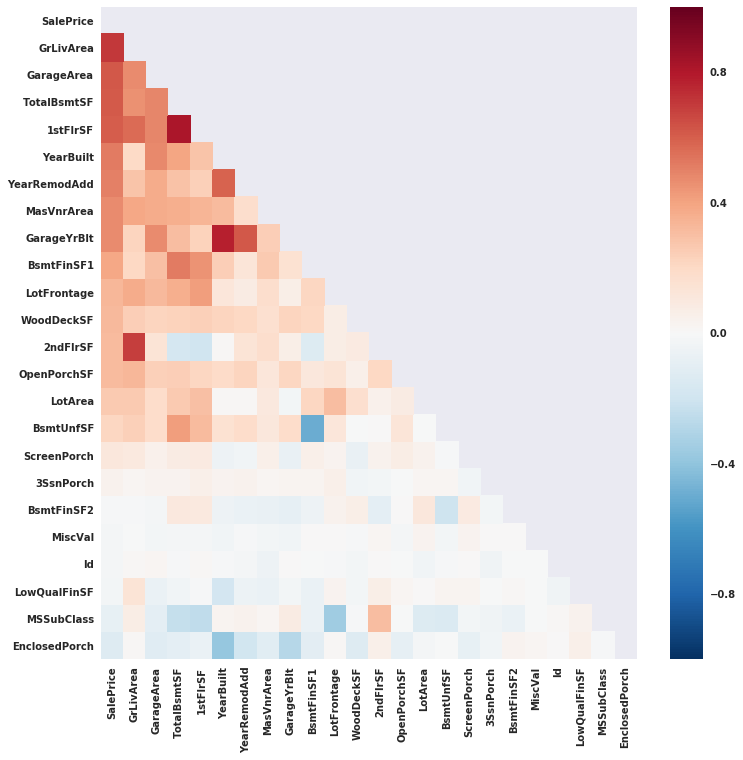

In [7]:
corr = df.corr()
corr.sort(columns='SalePrice',ascending=False,inplace = True)
corr.sort_values(by='SalePrice', ascending=False, axis=1, inplace = True)
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,12))
sns.heatmap(corr, vmax = 1, mask = mask)

#### Categorical Data

In [9]:
df = target.join(cat)

In [15]:
df.columns.values

array(['SalePrice', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition'], dtype=object)

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


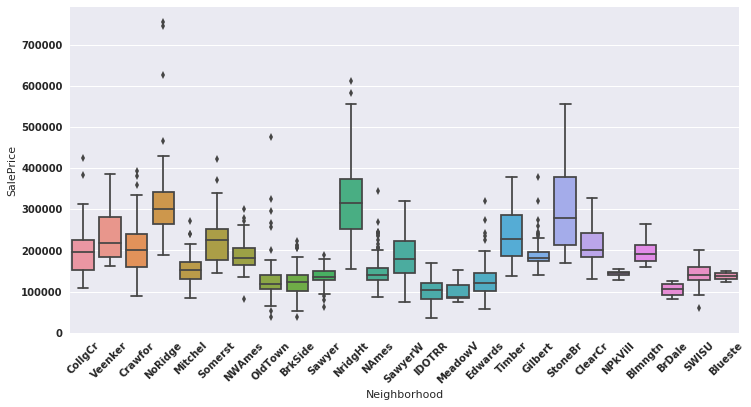

In [39]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = df)
xt=plt.xticks(rotation=45)

#### Sale Type / Condition

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


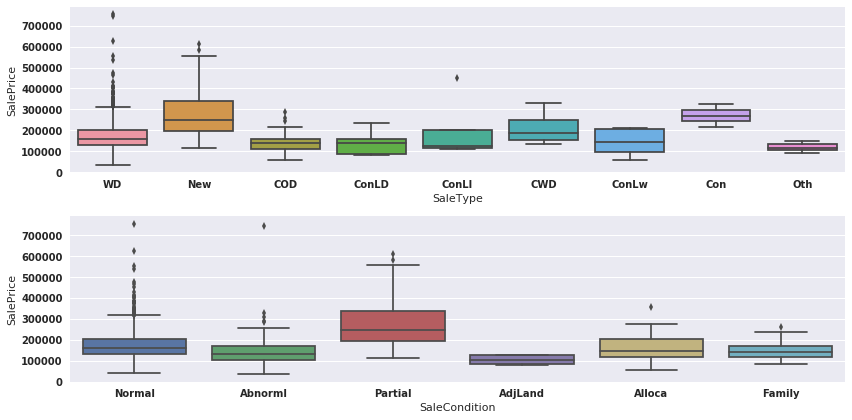

In [41]:
fig,ax = plt.subplots(2,1, figsize = (12,6))
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = df,ax = ax[0])
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = df,ax = ax[1])
plt.tight_layout()

#### Year Sold

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


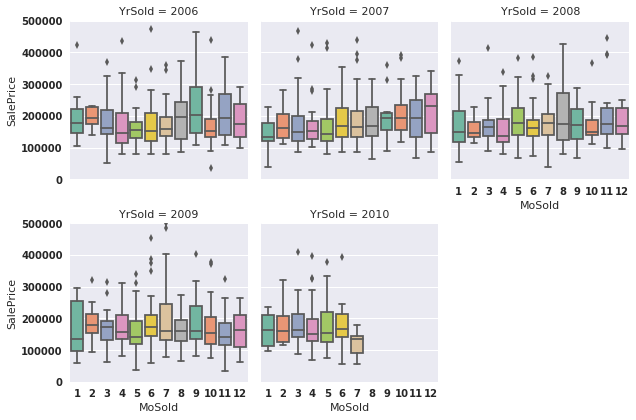

In [26]:
g = sns.FacetGrid(df, col = 'YrSold',col_wrap = 3)
g.map(sns.boxplot,'MoSold','SalePrice',palette='Set2',order = range(1,13))\
.set(ylim = (0,500000))


#### House Style

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


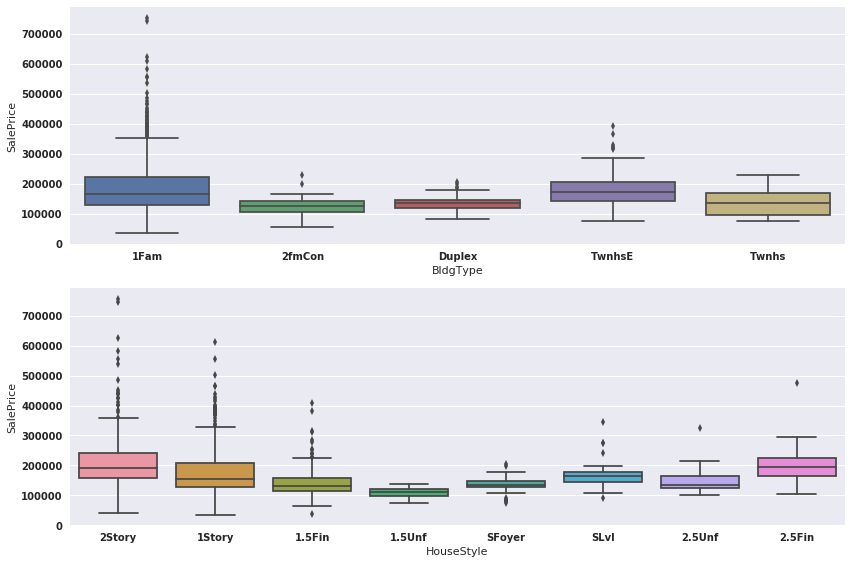

In [32]:
fig,ax = plt.subplots(2,1, figsize = (12,8))
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = df,ax = ax[0])
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = df,ax = ax[1])
plt.tight_layout()